<a href="https://colab.research.google.com/github/Elizabeth-George-M/Lab7/blob/main/Lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier


In [2]:
data = pd.read_csv('/content/employee_data (1) 2 - employee_data (1) 2.csv')

In [13]:
data.isnull().sum()

avg_monthly_hrs          0
department             709
filed_complaint      12191
last_evaluation          0
n_projects               0
recently_promoted    13949
salary                   0
satisfaction             0
status                   0
tenure                   0
dtype: int64

In [17]:
def num(data):
   num_var = []
   for col in data.columns:
    if data[col].dtype == "float64":
      num_var.append(col)
   return num_var


nv = num(data)


for col in nv:
  mean = data[col].mean()
  data[col].fillna(mean, inplace=True)

data.isnull().sum()

avg_monthly_hrs        0
department           709
filed_complaint        0
last_evaluation        0
n_projects             0
recently_promoted      0
salary                 0
satisfaction           0
status                 0
tenure                 0
dtype: int64

In [18]:
data.dropna(subset=['department'],inplace=True)

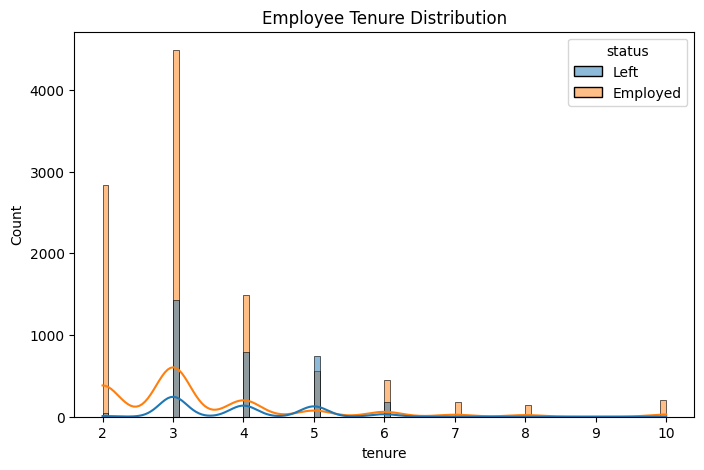

In [19]:
# Histogram for tenure
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x='tenure', hue='status', kde=True)
plt.title("Employee Tenure Distribution")
plt.show()

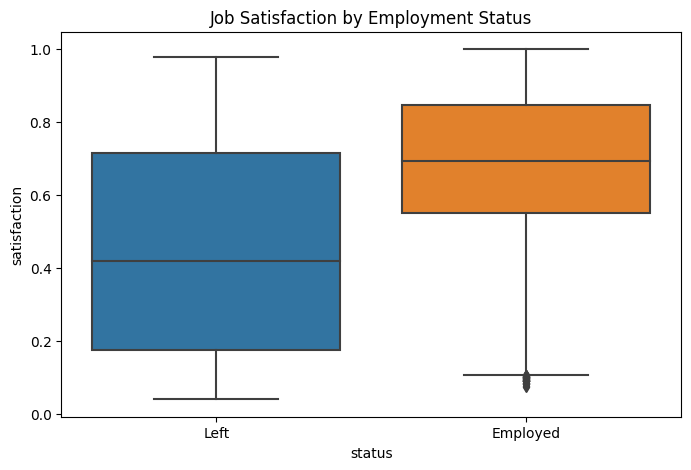

In [20]:
# Boxplot for job satisfaction
plt.figure(figsize=(8, 5))
sns.boxplot(data=data, x='status', y='satisfaction')
plt.title("Job Satisfaction by Employment Status")
plt.show()

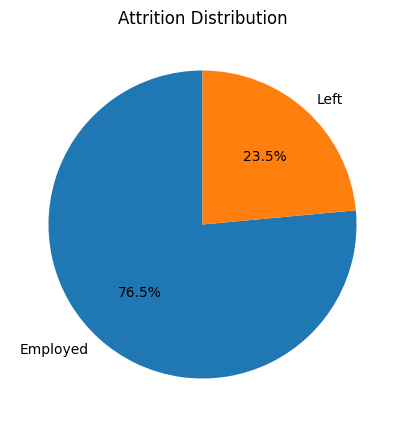

In [21]:
# Pie chart for attrition distribution
attrition_counts = data['status'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(attrition_counts, labels=attrition_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Attrition Distribution")
plt.show()

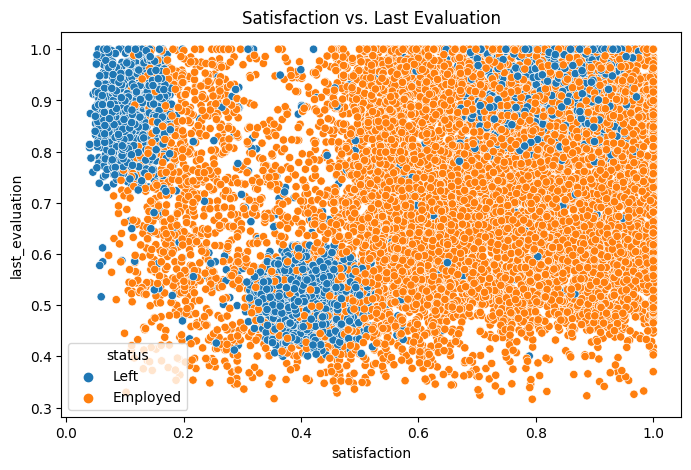

In [6]:
# Scatter plot for satisfaction vs. last evaluation
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x='satisfaction', y='last_evaluation', hue='status')
plt.title("Satisfaction vs. Last Evaluation")
plt.show()

In [22]:
# 2. Decision Tree Modeling

# Split the dataset into a training set and a testing set
X = data[['tenure', 'satisfaction', 'n_projects']]
y = data['status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
data['last_evaluation'].fillna(data['last_evaluation'].median(), inplace=True)
data['satisfaction'].fillna(data['satisfaction'].mean(), inplace=True)
data['tenure'].fillna(data['tenure'].median(), inplace=True)

In [24]:
# Build a decision tree classifier using Gini impurity
tree_gini = DecisionTreeClassifier(criterion='gini')
tree_gini.fit(X_train, y_train)

DecisionTreeClassifier()

In [26]:
# Visualize the decision tree
import graphviz
dot_data = export_graphviz(tree_gini, out_file=None, feature_names=X.columns, filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph.render("employee_attrition_gini_tree")


'employee_attrition_gini_tree.pdf'

In [27]:
# 3. Model Evaluation

# Make predictions
y_pred_gini = tree_gini.predict(X_test)

# Evaluate the model
accuracy_gini = accuracy_score(y_test, y_pred_gini)
precision_gini = precision_score

In [28]:
accuracy_gini

0.9283604135893648

In [30]:
precision_gini

<function sklearn.metrics._classification.precision_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')>